# Ring formation inside a lignin polymer

In [1]:
# set ligning path (optional if installed via pip)
import sys, os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..\..'))
print(project_path)
sys.path.insert(0, project_path)


import ligning.characterization as ch
import ligning.monomer as mono
import ligning.polymer as poly
import ligning.utils as ut

import time 
from rdkit import Chem

c:\Users\yifan\Documents\GitHub\LigninGraphs


RDKit WARNING: [17:22:54] Enabling RDKit 2019.09.3 jupyter extensions


Constructing a polymer for testing

Connect a S to a G unit (in polymer) via a 4-O-5 bond
Connect a S to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond


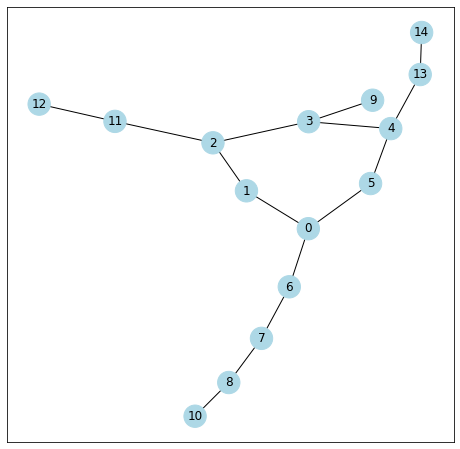

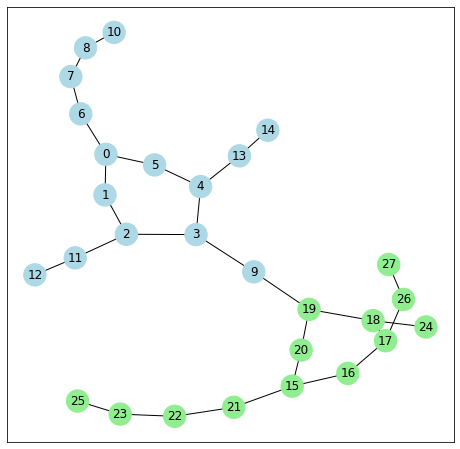

In [2]:
'''
Starting from a H monomer
'''
P0 = mono.Monomer("S")
P0_G = P0.create()
ut.draw_graph(P0_G)

polymer = poly.Polymer(P0)

'''
Add a G monomer with a linkage
'''
polymer.add_specific_linkage(linkage_type = '4-O-5', monomer_type = 'G')
P1_G = polymer.G
ut.draw_graph(P1_G)

'''
#Add n random monomers with beta-O-4 bonds and time the speed
'''
start = time.time()
n_iter = 10
for i in range(n_iter):
    polymer.add_specific_linkage(linkage_type ='beta-O-4', monomer_type =  'G')

n_monomer = n_iter + 2

Add the rings and visualize the atomic and big graphs

Connect a G to a G unit (in polymer) via a 5-5 bond
Connect a G to a G unit (in polymer) via a alpha-O-4 bond
Connect a G to a G unit (in polymer) via a 5-5 bond
Connect a G to a G unit (in polymer) via a 5-5 bond
Connect a G to a G unit (in polymer) via a 5-5 bond
Connect a G to a G unit (in polymer) via a 5-5 bond
OCC1Cc2cc(OC)c(Oc3c4c(OC)cc(CC(Oc5c(OC)cc6cc5c5c7c(OC)cc(CC(Oc8c(OC)cc9cc8c8c(OC(CO)Cc%10cc(OC)c(O1)c(c1c(OC(CO)Cc%11cc(OC)c%12c(c%13c(OC9CCO)c(OC)cc(CC(CO)O%12)c%13)c%11)c(OC)cc(CC(CO)O4)c1)c%10)c(OC)cc(CC(Oc1c(OC)cc(CC(O7)CO)cc1c1c(OC(CO)C6)c(OC)cc(C=CCO)c1)CO)c8)CO)c5)CO)c3)c(OC)c2
Lignin polymerization: 12 monomers takes 1.16508 s


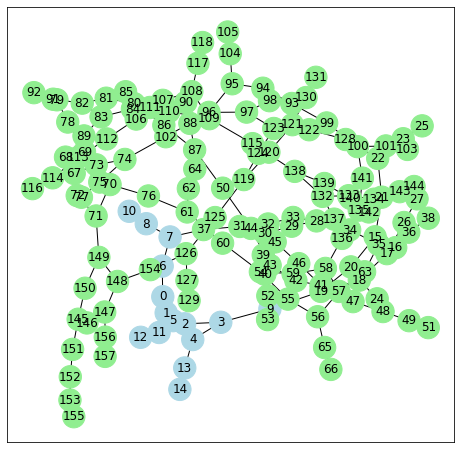

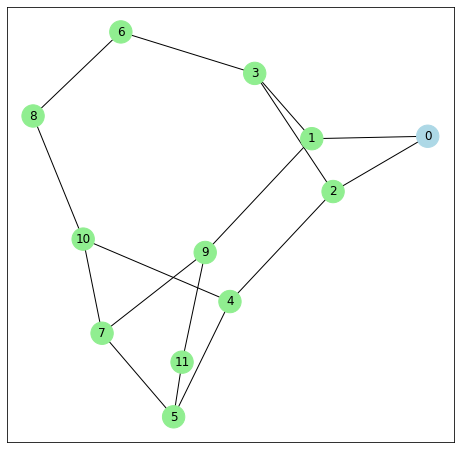

In [3]:
# Generate hypothetical structures with many rings
n_inter = 50 # try 50 iterations
for i in range(n_inter):
    polymer.add_random_ring()

Pn_G = polymer.G
Pn_bigG = polymer.bigG

ut.draw_graph(Pn_G)
ut.draw_graph(Pn_bigG)

# Convert graph to smiles
Pn_smiles = ut.graph_to_smile(Pn_G)
print(Pn_smiles)

# Convert smiles to mol and save the mol structure to an image file
Pn_mol = ut.graph_to_mol(Pn_G)
end = time.time()
run_time = end - start 
print("Lignin polymerization: %2d monomers takes %5.5f s" %(n_monomer, run_time))

Characterize the polymer

In [4]:
cPn = ch.Characterize(polymer)

# Calculate and print the polymer properties
print("\nCharaterizing the polymer...\n")
cPn.cal_all()


Charaterizing the polymer...

{   'G': <networkx.classes.graph.Graph object at 0x00000192010FDF48>,
    'MW': None,
    'Mol': None,
    'OCH3_count': 13.0,
    'OH_count': 12.0,
    'bigG': <networkx.classes.graph.Graph object at 0x00000192010972C8>,
    'branching_coeff': 0.6666666666666666,
    'connections_count': {2: 4, 3: 8},
    'linkages_count': {   '4-O-5': 1,
                          '5-5': 5,
                          'alpha-O-4': 1,
                          'beta-1': 0,
                          'beta-5': 0,
                          'beta-O-4': 9,
                          'beta-beta': 0},
    'metrics': None,
    'mol': None,
    'monomer_count': 12,
    'mtype_count': {'G': 11, 'H': 0, 'S': 1},
    'n_branched': 8,
    'smiles': None}
